## Introduction

#### Boundary element method

We focus on Laplace's equation:

$$
-\Delta u = 0
$$
used in electrostatics to find an electric field in a source-free region.\

On bounded domains $\Omega^- \subset \mathbb{R}^3$ or unbounded domains $\Omega^+ := \mathbb{R}^3 \setminus \Omega^-$

where we take $\nu$ as the outward surface normal from $\Omega^-$ on $\Gamma$


The boundary integral formulations of our PDEs will use the Dirichlet (D) and Neumann (N) traces of functions on the boundary. For sufficiently smooth functions p and q,
we define these by:

$$
\gamma_D^{\pm} p(x) := \lim_{\Omega^{\pm} \ni x' \to x \in \bar{\Gamma}} p(x')
$$

$$
\gamma_N^{\pm} q(x) := \lim_{\Omega^{\pm} \ni x' \to x \in \bar{\Gamma}} \nabla q(x') \cdot \nu_x
$$
where $\bar{\Gamma}$ is the set of all points on $\Gamma$ that are interior to a face of $\Gamma$ 

For our purposes we care for $p \in H^1_{loc}(\Omega^{\pm})$ and $q \in H^1_{loc}(\Delta, \Omega^{\pm})$, and that they are continuous:

Lemma: The traces
$$
\gamma_D^{\pm} : H^1_{loc}(\Omega^{\pm}) \to H^{\frac{1}{2}}(\Gamma)
$$
are continuous and surjective and the traces:
$$
\gamma_N^{\pm} : H^1_{loc}(\Delta, \Omega^{\pm}) \to H^{-\frac{1}{2}}(\Gamma)
$$
are continuous

And we can use traces to define the space:

$$
H^{\frac{1}{2}}(\Gamma) := \gamma_D^-(H^1(\Omega^-)) = \{\gamma_D^-p:p\in H^1(\Omega^-)\}
$$

from which we define $H^{-\frac{1}{2}}(\Gamma)$ as the dual

We will also need to define the jump $[\![\cdot]\!]_{\Gamma}$ and average $\{\cdot\}_{\Gamma}$ operators:

$$
[\![\gamma]\!]_{\Gamma}f := \gamma^+f-\gamma^-f
$$
$$
\{\cdot\}_{\Gamma}f := \frac{1}{2}(\gamma^+f+\gamma^-f)
$$

To solve Laplace's equation, we look for $u \in H^1_{loc}(\Delta, \Omega^{\pm})$ s.t. $-\Delta u = 0$ in $\Omega^{\pm}$

In the case of exterior problems, for uniqueness, we require a condition at infinity i.e.:
$$
u(x)\to 0 \;\;\;\;\; \textrm{as} \;\;\;\; \lvert x \rvert \to \infty;
$$

and we focus on the Dirichlet and Neumann boundary conditions, $u = g_D$ on $\Gamma_D$, $\frac{\partial u}{\partial \nu} = g_N$ on $\Gamma_N$, where $g_D \in H^{\frac{1}{2}}(\Gamma)$ and $g_N \in H^{-\frac{1}{2}}(\Gamma)$

The boundary element method (BEM) has two key ingredients: a representation formula and a boundary integral equation. The representation formula describes how to reconstruct the function u in Ω± \ Γ using an unknown function on the boundary Γ. The boundary integral equation can be used to find this unknown function. BEM involves discretising the boundary integral equations in order to find an approximation of the unknown boundary function.

In this section, we define the potential operators that we will use to write representation formulae, and the boundary operators that we will use to write boundary integral equations. We also summarise some important properties of these operators

We define the Green’s function of a PDE to be the solution of the PDE with the Dirac delta function on the right hand side. The Green’s function for the Laplace operator in R3 is:

$$
G(x, y) = \frac{1}{4\pi\lvert x-y\rvert}
$$
as $\Delta_xG(x,y) = \delta(x-y)$

In order to be able to use the boundary element method, we need to know the Green's function of the PDE in question. (This is what limits the number of problems that the boundary element method can be used to solve.) The Green's function is the solution as every point in 3D (or 2D if you prefer) except for one point, where it has an infinite value, but a very special type of infinite value. The Green's function gives the field due to a unit point source at the chosen point.
If a region contains no sources, then the solution inside that region can be represented by adding up point sources at every point on the boundary (or in other words, integrating the Green's function times a weighting function, as the limit of adding up these at lots of points is an integral). The solution could instead be represented by doing the same thing with the derivative of the Green's function.

And now we introduce the single and double layer potential operators, $\mathcal{V}: H^{-\frac{1}{2}}(\Gamma) \to H^1_{loc}(\Omega^{\pm})$ and $\mathcal{K}: H^{\frac{1}{2}}(\Gamma) \to H^1_{loc}(\Omega^{\pm})$ for $v \in H^{\frac{1}{2}}(\Gamma)$ and $\mu \in H^{-\frac{1}{2}}(\Gamma)$ and $x \in \Omega^{\pm} \setminus \Gamma$ by:

$$
(\mathcal{V}\mu)(x) := \int_{\Gamma}G(x,y)\mu(y)dy\\
(\mathcal{K}v)(x) := \int_{\Gamma}\frac{\partial G(x,y)}{\partial \nu_y}v(y)dy
$$

and then if the Dirichlet and Neumann traces of a function $u \in H^1_{loc}(\Delta, \Omega^{\pm})$ that solves Laplace are known, then we can use the above potentials to reconstruct the solution in $\Omega^{\pm}$ via:

$$
u = \mathcal{K}([\![\gamma_D u]\!]_{\Gamma}) - \mathcal{V}([\![\gamma_N u]\!]_{\Gamma})
$$

and then with $u \in H^1(\Omega^{\mp})$ solving Laplace

$$
\tilde{u} = 
\begin{cases}
    u(x) & \text{if } x \in \mathbb{\Omega^{\pm}}\\
    0 & \text{if } x \in \mathbb{\Omega^{\mp}}
\end{cases}
$$

yields the representaiton formulae for interior and exterior problems respectively:

$$
u = -\mathcal{K}(\gamma_D^- u) + \mathcal{V}(\gamma_N^- u)\\
u = \mathcal{K}(\gamma_D^+ u) - \mathcal{V}(\gamma_N^+ u)
$$

[make a comment on how to access these potentials in bempp]

##### Boundary operators

Next, we define the single layer, double layer, adjoint double layer, and hypersingular boundary integral operators,

$$
V: H^{-\frac{1}{2}}(\Gamma)\to H^{\frac{1}{2}}(\Gamma)\\
K: H^{\frac{1}{2}}(\Gamma)\to H^{\frac{1}{2}}(\Gamma)\\
K': H^{-\frac{1}{2}}(\Gamma)\to H^{-\frac{1}{2}}(\Gamma)\\
W: H^{\frac{1}{2}}(\Gamma)\to H^{-\frac{1}{2}}(\Gamma)\\
$$
for $x\in\Gamma$, $v\in H^{\frac{1}{2}}(\Gamma)$ and $\mu\in H^{-\frac{1}{2}}(\Gamma)$ by:

$$
(Kv)(x) := \{\gamma_D \mathcal{K}v\}_{\Gamma}(x)\\
(V\mu)(x) := \{\gamma_D \mathcal{V}\mu\}_{\Gamma}(x)\\
(Wv)(x) := -\{\gamma_N \mathcal{K}v\}_{\Gamma}(x)\\
(K'\mu)(x) := \{\gamma_N \mathcal{V}\mu\}_{\Gamma}(x)
$$
then with the following facts on the jump conditions: $[\![\gamma_D ]\!]_{\Gamma}\mathcal{V} = [\![\gamma_N ]\!]_{\Gamma}\mathcal{K} = 0$ and $[\![\gamma_N ]\!]_{\Gamma}\mathcal{V} = -[\![\gamma_D ]\!]_{\Gamma}\mathcal{K} = -I$, we see that for the exterior traces:

$$
\gamma_D^+\mathcal{V} = V\\
\gamma_N^+\mathcal{V} = -\frac{1}{2}I + K'\\
\gamma_D^+\mathcal{K} = \frac{1}{2}I + K\\
\gamma_N^+\mathcal{K} = -W
$$

and for the interior traces:

$$
\gamma_D^-\mathcal{V} = V\\
\gamma_N^-\mathcal{V} = \frac{1}{2}I + K'\\
\gamma_D^-\mathcal{K} = -\frac{1}{2}I + K\\
\gamma_N^-\mathcal{K} = -W
$$

These results allow us to take the traces of the previous representation formulas, yielding the foloowing boundary integral equations: so if $u \in H^1(\Omega^-)$ solves Laplace, then:

$$
\gamma_D^-u = (\frac{1}{2}I - K)\gamma_D^-u + V\gamma_N^-u\\
\gamma_N^-u = (\frac{1}{2}I + K')\gamma_N^-u + W\gamma_D^-u
$$

and then if we write $u = \gamma_D^-u$ and define $\lambda := \gamma_N^-u$, we obtain the following equations for the interior problem:

$$
u = (\frac{1}{2}I - K)u + V\lambda\\
\lambda = (\frac{1}{2}I + K')\lambda + Wu
$$

analagously for $u\in H^1_{loc}(\Omega^+)$:
$$
u = (\frac{1}{2}I + K)u - V\lambda\\
\lambda = (\frac{1}{2}I - K')\lambda - Wu
$$
where now $u = \gamma_D^+u$ and define $\lambda := \gamma_N^+u$


This yields the definition of the Calderón projector,

$$
C_{int} = 
\begin{bmatrix}
\frac{1}{2}-K & V\\
W & \frac{1}{2}+K'
\end{bmatrix}
$$

$$
C_{ext} = 
\begin{bmatrix}
\frac{1}{2}+K & -V\\
-W & \frac{1}{2}-K'
\end{bmatrix}
$$

We treat the Calderón operator like a matrix, even though its entries are operators not numbers. The Calderón projector has some very useful properties that are commonly used when using the boundary element method. These include: $C^2 = C$; if we apply $C$ to a solution of the PDE, the Calderón projector does nothing to the input;
if we apply $C$ to any functions, the result will be a solution of the PDE.

Therefore, internal and external problems can be written:
$$
C^{\pm}
\begin{bmatrix}
           u \\
           \lambda
\end{bmatrix}
=
\begin{bmatrix}
           u \\
           \lambda
\end{bmatrix}
$$


#### Remarks

For Laplace, single layer and hypersingular operator in $\mathcal{R}^3$ are coercive, when $\Gamma$ is a Lipschitz domain

Furthermore, $V$, $K$, $K'$ and $W$ are all bounded/continuous.

Finally and most interestingly, $\forall \mu \in H^{-\frac{1}{2}(\Gamma)}$, the function $u_{\mu}^{\mathcal{V}} := \mathcal{V}\mu$, satisfies $-\Delta u_{\mu}^{\mathcal{V}} = 0$ in $\Omega^- \cup \Omega^+$

and $\forall v \in H^{\frac{1}{2}(\Gamma)}$, the function $u_{v}^{\mathcal{K}} := \mathcal{K}v$, satisfies $-\Delta u_{v}^{\mathcal{K}} = 0$ in $\Omega^- \cup \Omega^+$

and 

$$
\lVert u_{\mu}^{\mathcal{V}} \rVert_{H^1(\Omega^-)} \leq c\lVert \mu \rVert_{H^{-\frac{1}{2}}(\Gamma)}\\
\lVert u_{v}^{\mathcal{K}} \rVert_{H^1(\Omega^-)} \leq c\lVert v \rVert_{H^{-\frac{1}{2}}(\Gamma)}
$$

#### Discrete algebra + Preconditioning

In this section, we present an abstract framework for the representation of operator products and their discretisation, and look at the properties of the discrete spaces that this approach requires.

This is an important process to understand, for both preconditioning and standard usage, as the importance of the dual to the range space is not immediately clear.

Let $A: \mathcal{H}_A^{dom}\to\mathcal{H}_A^{ran}$ and $B: \mathcal{H}_B^{dom}\to\mathcal{H}_B^{ran}$, be operators between Hilbert spaces. Assuming $\mathcal{H}_A^{ran} \subset \mathcal{H}_B^{dom}$:

$$
g = BAf
$$
is well-defined in $\mathcal{H}_B^{ran}$\

Now, we decompose this matrix product into:

$$
q = Af\\
g = Bq
$$

To introduce an algebraic representation we want to set these as variational equations and introduce a basis. To this end we need to define the dual to the range space i.e. define $\mathcal{H}_A^{dual}$ that is dual to $\mathcal{H}_A^{ran}$ and a dual pairing $\langle \cdot,\cdot\rangle_A: \mathcal{H}_A^{ran} \times \mathcal{H}_A^{dual} \to \mathbb{C}$, therefore:

$$
\langle Af, \mu\rangle_A = \langle q, \mu \rangle_A \;\;\;\; \forall \mu\in\mathcal{H}_A^{dual}\\
\langle Bq, \eta\rangle_B = \langle g, \eta \rangle_B \;\;\;\; \forall \eta\in\mathcal{H}_B^{dual}
$$

At which point we can now introduce our finite dimensional subspaces:

$$
\mathcal{H}_{h,A}^{dom} := \textrm{span}\{\phi^{dom}_{i,A}\}\subset\mathcal{H}_A^{dom}\\
\mathcal{H}_{h,A}^{ran} := \textrm{span}\{\phi^{ran}_{i,A}\}\subset\mathcal{H}_A^{ran}\\
\mathcal{H}_{h,A}^{dual} := \textrm{span}\{\phi^{dual}_{i,A}\}\subset\mathcal{H}_A^{dual}\\
\mathcal{H}_{h,B}^{dom} := \textrm{span}\{\phi^{dom}_{i,B}\}\subset\mathcal{H}_B^{dom}\\
\mathcal{H}_{h,B}^{ran} := \textrm{span}\{\phi^{ran}_{i,B}\}\subset\mathcal{H}_B^{ran}\\
\mathcal{H}_{h,B}^{dual} := \textrm{span}\{\phi^{dual}_{i,B}\}\subset\mathcal{H}_B^{dual}
$$

Therefore our discretised forms become:

$$
\mathbf{Af_h}=\mathbf{M_Aq_h}\\
\mathbf{Bq_h}=\mathbf{M_Bg_h}
$$

where

$$
\left[\mathbf{A}\right]_{i,j} = \langle A\phi_{j,A}^{dom}, \phi_{i,A}^{dual}\rangle_A\\
\left[\mathbf{M_A}\right]_{i,j} = \langle \phi_{j,A}^{ran}, \phi_{i,A}^{dual}\rangle_A\\
\left[\mathbf{B}\right]_{i,j} = \langle B\phi_{j,B}^{dom}, \phi_{i,B}^{dual}\rangle_B\\
\left[\mathbf{M_B}\right]_{i,j} = \langle \phi_{j,B}^{ran}, \phi_{i,B}^{dual}\rangle_B
$$
where then $\mathbf{f}_h$, $\mathbf{q}_h$ and $\mathbf{g}_h$ are the vectors of coefficients of the approximation of the functions on the dicrete spaces. Putting this all together:

$$
\mathbf{g}_h = \mathbf{M_B^{-1}BM^{-1}_AAf}_h 
$$
Through this we define the discrete strong form of an operator $A$ as $A^S := M_A^{-1}A$, as such the above can be read as:

$$
\mathbf{g}_h = \mathbf{B^SA^Sf}_h 
$$

So given two operators $A$ and $B$ and their discrete weak forms $\mathbf{A}$ and $\mathbf{B}$, we define their product as:

$$
\mathbf{B}\odot\mathbf{A} := \mathbf{BA}^S
$$

where $\mathbf{B}\odot\mathbf{A}$ represents the discrete weak form of the product $BA$. The discrete strong form of $BA$ is given by $\mathbf{B}^S\odot\mathbf{A}$

The evaluation of the discrete strong form of an operator A requires computing the
inverse of the mass matrix MA, and so in order to form a stable discretisation of operator
products, we need the condition number of MA to remain bounded as the mesh parameter
h is reduced. A necessary condition for $\mathcal{k}(\mathbf{M}_A) \leq c_A'$, for constant $c_A'$ independent of h, is the infsup condition between the range and the dual of the mas matrix, which is respected if there exists an h-independent constant $c_A > 0$ s.t.:

$$
\sup_{\phi_h^{dual}\in\mathcal{H}^{dual}_{h,A}}\frac{\langle\phi_h^{ran},\phi_h^{dual} \rangle_A}{\lVert \phi_h^{dual}\rVert_{\mathcal{H}_A^{dual}}} \geq c_A \lVert \phi_h^{ran}\rVert_{\mathcal{H}_A^{ran}}
$$

This all motivates how operators are defined in Bempp:

op = operator(domain, range, dual_to_range)

and we can access the strong and weak forms of the operator via:

discrete_weak_form = op.weak_form ()
discrete_strong_form = op.strong_form ()

The multiplication with the inverse of the mass matrix in the strong form is implemented via the computation of an LU
decomposition and solving the associated linear system.
As discretising an operator is expensive, the weak form is computed when the method weak_form() is first called and then cached. Similarly, the LU decomposition necessary for the strong form is computed only once and then cached.

The full Bempp GMRES implementation provides, among other options, a keyword attribute use_strong_form. If this is set to True, then inside the GMRES routine the solution is computed as

x, info = linalg .gmres(A. strong_form (), b. coefficients )

This corresponds to mass matrix preconditioning and comes naturally as part of this algebra.

The implementation of this operator algebra allows for the easy implementation of operator preconditioning methods, and mass matrix preconditioning.

Suppose we want to solve $Au=f$, the discrete weak form of this equation is:
$$
\mathbf{Au}_h = \mathbf{M}_A\mathbf{f}_h 
$$

Therefore, mass matrix preconditioning reduces to taking the strong form of the operator $A$:
$$
\mathbf{M}_A^{-1}\mathbf{Au}_h = \mathbf{f}_h \\
\mathbf{A}^S\mathbf{u}_h = \mathbf{f}_h 
$$
Operator preconditioning arises from applying an operator on the continuous level, then discretising. For example, the operator B can be applied to give the equation BAu = Bf . The weak form of this equation is
$$
\mathbf{BM}_A^{-1}\mathbf{Au}_h = \mathbf{M}_B\mathbf{f}_h \\
\mathbf{B}\odot\mathbf{Au}_h = \mathbf{M}_B\mathbf{f}_h
$$
This is the operator preconditioned formulation. Typically, an operator A is preconditioned with an operator of the opposite order 


We introduce a family of conforming, shape regular triangulations of Γ, {Th}h>0, indexed by the largest element diameter of the mesh, h. We let T1, ..., To be the triangles in the triangulation Th. We assume that the triangulations are fitted to the different boundary sets ΓD, ΓR and ΓN

Piecewise polynomial spaces
We define the space of continuous polynomial functions by

$$
P^k_h:=\{v_h \in C^0(\Gamma):v_h\vert_{T_i}\in\mathbb{P}_k(T_i),\;\;\forall T_i \in \mathcal{T}_h\}
$$
We define the space of discontinuous polynomial functions by
$$
DP^l_h:=\{v_h \in L^2(\Gamma):v_h\vert_{T_i}\in\mathbb{P}_l(T_i),\;\;\forall T_i \in \mathcal{T}_h\}
$$
Observe that $P^k_h\subset H^{\frac{1}{2}(\Gamma)}$ and $DP^l_h\subset L^2(\Gamma)$

[DO I WANT ALL THE APPROXIMATION PROPERTIES?]

Dual polynomial spaces
In addition to the polynomial spaces described above, we will also use polynomial spaces defined on the dual grid. As shown in figure 2.3, the dual grid is defined by barycentrically
refining each triangle in the grid: a straight line is drawn from each vertex to the midpoint of the opposite side, splitting each triangle into six smaller triangles. The elements of the dual grid are then made up of all the triangles in the refined grid that are attached to a
given vertex in the original grid

We define DUAL0 h(Γ) to be the space of piecewise constant functions on the dual grid. We observe that DUAL0
h(Γ) ⊂ L2(Γ).

This space forms a inf-sup stable dual pairing with
the space of continuous linear functions P1 h(Γ), as given in the following result. The space pairing P1
h(Γ) × DUAL0 h(Γ) therefore satisfies assumption 2.1

We define DUAL1h(Γ) to be the space of piecewise linear functions spanned by the basis functions ξ1, ..., ξo. We observe that DUAL1h(Γ) ⊂ H1/2(Γ). The space was defined in [16], as a space that forms a inf-sup stable dual
pairing with the space of piecewise constant functions DP0
h(Γ), as given in the following result. The space pairing
DUAL1h(Γ) × DP0h(Γ) therefore satisfies assumption 2.1

Typically, we will use the space DUAL0h(Γ) to approximate the normal derivative λ = γNu of the solution u. When Γ is smooth, the normal ν will be continuous across edges, and we will expect order 1 convergence due to corollary B.1.

In some cases, for example when weakly imposing boundary conditions on the cube as in chapter 3, it is undesirable to use the space DUAL0h(Γ) as the domain of the single layer
operator due to this space’s lower order convergence properties (lemma 2.4). In cases such as this, it may be more desirable to the following discretisation spaces.

The result of applying the Calderón projector to any two functions is a pair of compatible Cauchy data

[ADD IN ALL THE BASIS PICS]

In [27]:
import bempp.api
import numpy as np


i = []
ii = []
iii = []
iv = []
H = [1, 0.8, 0.5, 0.3, 0.1, 0.09, 0.07, 0.05]
for h in H:

    grid = bempp.api.shapes.sphere(h=h)

    dp0_space = bempp.api.function_space(grid, "P", 1)
    p1_space = bempp.api.function_space(grid, "P", 1)

    identity = bempp.api.operators.boundary.sparse.identity(
        p1_space, p1_space, dp0_space)
    dlp = bempp.api.operators.boundary.laplace.double_layer(
        p1_space, p1_space, dp0_space)
    slp = bempp.api.operators.boundary.laplace.single_layer(
        dp0_space, p1_space, dp0_space)
    W = bempp.api.operators.boundary.laplace.hypersingular(p1_space, dp0_space, p1_space)

    @bempp.api.real_callable
    def dirichlet_data(x, n, domain_index, result):
        result[0] = 1./(4 * np.pi * ((x[0] - .9)**2 + x[1]**2 + x[2]**2)**(0.5))
        # result[0] = 1./(4 * np.pi * ((x[0] - 1)**2 + x[1]**2 + x[2]**2)**(0.5))
        # result[0] = 1
        
    dirichlet_fun = bempp.api.GridFunction(p1_space, fun=dirichlet_data)

    rhs = (.5 * identity + dlp)

    neumann_fun, info, it = bempp.api.linalg.gmres(slp, rhs* dirichlet_fun, tol=1E-5, return_iteration_count=True)
    i.append(it)
    neumann_fun, info, it = bempp.api.linalg.gmres(slp, rhs*dirichlet_fun, tol=1E-5, use_strong_form=True, return_iteration_count=True)
    ii.append(it)
    neumann_fun, info, it = bempp.api.linalg.gmres(W*slp, W*rhs* dirichlet_fun, tol=1E-5, return_iteration_count=True)
    iii.append(it)
    neumann_fun, info, it = bempp.api.linalg.gmres(W*slp, W*rhs* dirichlet_fun, tol=1E-5, use_strong_form=True, return_iteration_count=True)
    iv.append(it)


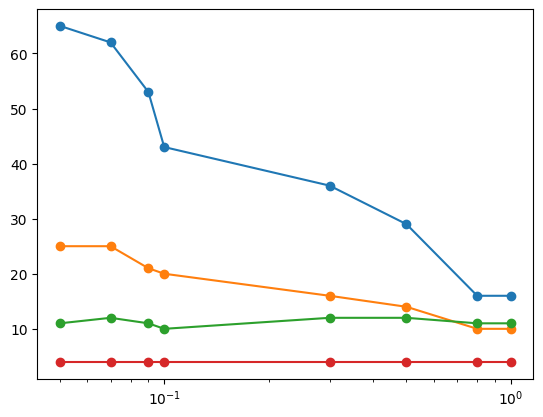

In [30]:
import matplotlib.pyplot as plt
plt.plot(H, i, marker='o')
plt.plot(H, ii, marker='o')
plt.plot(H, iii, marker='o')
plt.plot(H, iv, marker='o')
plt.gca().set_xscale('log')

In [31]:
import bempp.api
import numpy as np


ic = []
iic = []
iiic = []
ivc = []
Hc = [1, 0.8, 0.5, 0.3, 0.1, 0.09, 0.07, 0.05]
for h in H:

    grid = bempp.api.shapes.cube(h=h)

    dp0_space = bempp.api.function_space(grid, "P", 1)
    p1_space = bempp.api.function_space(grid, "P", 1)

    identity = bempp.api.operators.boundary.sparse.identity(
        p1_space, p1_space, dp0_space)
    dlp = bempp.api.operators.boundary.laplace.double_layer(
        p1_space, p1_space, dp0_space)
    slp = bempp.api.operators.boundary.laplace.single_layer(
        dp0_space, p1_space, dp0_space)
    W = bempp.api.operators.boundary.laplace.hypersingular(p1_space, dp0_space, p1_space)

    @bempp.api.real_callable
    def dirichlet_data(x, n, domain_index, result):
        result[0] = 1./(4 * np.pi * ((x[0] - .9)**2 + x[1]**2 + x[2]**2)**(0.5))
        # result[0] = 1./(4 * np.pi * ((x[0] - 1)**2 + x[1]**2 + x[2]**2)**(0.5))
        # result[0] = 1
        
    dirichlet_fun = bempp.api.GridFunction(p1_space, fun=dirichlet_data)

    rhs = (.5 * identity + dlp)

    neumann_fun, info, it = bempp.api.linalg.gmres(slp, rhs* dirichlet_fun, tol=1E-5, return_iteration_count=True)
    ic.append(it)
    neumann_fun, info, it = bempp.api.linalg.gmres(slp, rhs*dirichlet_fun, tol=1E-5, use_strong_form=True, return_iteration_count=True)
    iic.append(it)
    neumann_fun, info, it = bempp.api.linalg.gmres(W*slp, W*rhs* dirichlet_fun, tol=1E-5, return_iteration_count=True)
    iiic.append(it)
    neumann_fun, info, it = bempp.api.linalg.gmres(W*slp, W*rhs* dirichlet_fun, tol=1E-5, use_strong_form=True, return_iteration_count=True)
    ivc.append(it)


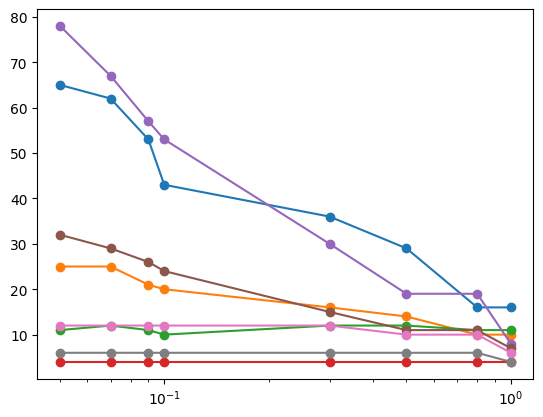

In [32]:
plt.plot(H, i, marker='o')
plt.plot(H, ii, marker='o')
plt.plot(H, iii, marker='o')
plt.plot(H, iv, marker='o')
plt.plot(H, ic, marker='o')
plt.plot(H, iic, marker='o')
plt.plot(H, iiic, marker='o')
plt.plot(H, ivc, marker='o')
plt.gca().set_xscale('log')

In [10]:
import bempp.api
import numpy as np


icc = []
iicc = []
iiicc = []
ivcc = []
H = [1, 0.8, 0.5, 0.3, 0.1]#, 0.09, 0.07, 0.05]
for h in H:
    ## tables from pg53 scroggs

    grid = bempp.api.shapes.cube(h=h)

    dp0_space = bempp.api.function_space(grid, "DUAL", 0)
    p1_space = bempp.api.function_space(grid, "P", 1)
    dual0_space = bempp.api.function_space(grid, "DUAL", 0)
    dual1_space = bempp.api.function_space(grid, "DUAL", 0)

    identity = bempp.api.operators.boundary.sparse.identity(
        p1_space, p1_space, dual0_space)
    dlp = bempp.api.operators.boundary.laplace.double_layer(
        p1_space, p1_space, dual0_space, assembler='fmm')
    slp = bempp.api.operators.boundary.laplace.single_layer(
        dual0_space, p1_space, dual0_space, assembler='fmm')
    W = bempp.api.operators.boundary.laplace.hypersingular(p1_space, dp0_space, p1_space, assembler='fmm')

    @bempp.api.real_callable
    def dirichlet_data(x, n, domain_index, result):
        result[0] = 1./(4 * np.pi * ((x[0] - .9)**2 + x[1]**2 + x[2]**2)**(0.5))
        # result[0] = 1./(4 * np.pi * ((x[0] - 1)**2 + x[1]**2 + x[2]**2)**(0.5))
        # result[0] = 1
        
    dirichlet_fun = bempp.api.GridFunction(p1_space, fun=dirichlet_data)

    rhs = (.5 * identity + dlp)

    neumann_fun, info, it = bempp.api.linalg.gmres(slp, rhs* dirichlet_fun, tol=1E-5, return_iteration_count=True)
    icc.append(it)
    neumann_fun, info, it = bempp.api.linalg.gmres(slp, rhs*dirichlet_fun, tol=1E-5, use_strong_form=True, return_iteration_count=True)
    iicc.append(it)
    neumann_fun, info, it = bempp.api.linalg.gmres(W*slp, W*rhs* dirichlet_fun, tol=1E-5, return_iteration_count=True)
    iiicc.append(it)
    neumann_fun, info, it = bempp.api.linalg.gmres(W*slp, W*rhs* dirichlet_fun, tol=1E-5, use_strong_form=True, return_iteration_count=True)
    ivcc.append(it)


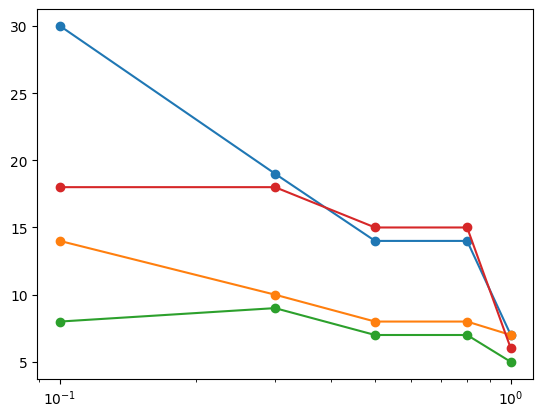

In [11]:
import matplotlib.pyplot as plt
plt.plot(H, icc, marker='o')
plt.plot(H, iicc, marker='o')
plt.plot(H, iiicc, marker='o')
plt.plot(H, ivcc, marker='o')
plt.gca().set_xscale('log')

Suppose we are trying to solve $Ax=b$, where $A$ is a matrix, $b$ is a (known) vector, and $x$ is the vector we are trying to find. When $A$ is a very large matrix, it is common to only solve this approximately, and many methods are known that can achieve good approximations of the solution. To get a good idea of how quickly these methods will work, we can calculate the condition number of the matrix: the condition number is a value that is big when the matrix will be slow to solve (we call the matrix ill-conditioned); and is small when the matrix will be fast to solve (we call the matrix well-conditioned).

The matrices we get when using the boundary element method are often ill-conditioned. To speed up the solving process, it is common to use preconditioning: instead of solving $Ax=b$
, we can instead pick a matrix  $P$ and solve

$$
PAx = Pb
$$

If we choose the matrix $P$ carefully, we can obtain a matrix $PA$ that has a lower condition number than $A$
, so this new system could be quicker to solve.

When using the boundary element method, it is common to use properties of the Calderón projector to work out some good preconditioners. For example, the single layer operator $V$
when discretised is often ill-conditioned, but the product of it and the hypersingular operator $WV$
is often better conditioned. This type of preconditioning is called operator preconditioning or Calderón preconditioning.

If the product $WV$ is discretised, the result is

$$
wM^{-1}w
$$


where $w$ and $v$ are discretisations of $W$ and $V$, and $M$ is a matrix called the mass matrix that depends on the discretisation spaces used to discretise $W$ and $V$.

In our software Bempp, the mass matrices $M$ are automatically included in product like this, which makes using preconditioning like this easier to program.

As an alternative to operator preconditioning, a method called mass matrix preconditioning is often used: this method uses the inverse mass matrix $M^{-1}$ as a preconditioner (so is like the operator preconditioning example without the $w$)

### DISCRETE SPACES

#### Discrete spaces

We begin by looking at the definitions of the discrete function spaces that we will use when performing discretisation. Imagine that the boundary of our region has been split into a mesh of triangles. (The pictures in this post show a flat mesh of triangles, although in reality this mesh will usually be curved.)

We define the discrete spaces by defining a basis function of the space. The discrete space will have one of these basis functions for each triangle, for each edge, or for each vertex (or a combination of these) and the space is defined to contain all the sums of multiples of these basis functions.

The first space we define is DP0 (discontinuous polynomials of degree 0). A basis function of this space has the value 1 inside one triangle, and has the value 0 elsewhere

Next we define the P1 (continuous polynomials of degree 1) space. A basis function of this space has the value 1 at one vertex in the mesh, 0 at every other vertex, and is linear inside each triangle

Higher degree polynomial spaces can be defined, but we do not use them here.

For Maxwell's equations, we need different basis functions, as the unknowns are vector functions. The two most commonly spaces are RT (Raviart–Thomas) and NC (Nédélec) spaces.

##### More discrete spaces

As the inverse mass matrix
appears everywhere in the preconditioning methods we would like to use, it would be great if this matrix was well-conditioned: as if it is, it's inverse can be very quickly and accurately approximated.
There is a condition called the inf-sup condition: if the inf-sup condition holds for the discretisation spaces used, then the mass matrix will be well-conditioned. Unfortunately, the inf-sup condition does not hold when using a combination of DP0 and P1 spaces.
All is not lost, however, as there are spaces we can use that do satisfy the inf-sup condition. We call these DUAL0 and DUAL1, and they form inf-sup stable pairs with P1 and DP0 (respectively). They are defined using the barycentric dual mesh: this mesh is defined by joining each point in a triangle with the midpoint of the opposite side, then making polygons with all the small triangles that touch a vertex in the original mesh

#### Analysis
see section 3


a slide on the pros and cons of bempp?

## Reading

#### Indirect Boundary Integral Equations
In the previous sections we have looked at the derivation of so-called direct
boundary integral equation formulations, obtained from Green’s theorem.

There is another whole class of integral equation formulations, called indirect
formulations, obtained in the following way.
To explain these formulations we need to introduce the so-called single-and double-layer potentials which in fact, as we will see in a moment, we have already met in particular cases.

Suppose that D is a domain with boundary ∂D; we assume that the boundary ∂D is finite in extent (which is the case if D is bounded or if D is the exterior of a bounded set). Given a function ϕ defined on ∂D, we call the function vs, defined by

$$
v_s(x) := \int_{\partial D}G(x,y)\phi (y) ds(y)
$$

for $x \in \mathbb{R}^3$, and $\phi$ the single layer potential density.

In physical terms G(x, y) is the field at x due to a source at y in free space. The single- layer potential is the field in free space due to a sum (well, the limit of a sum, i.e. an integral) of sources smeared over the boundary ∂D, with ϕ(y) denoting the density (the magnitude and phase) of those sources at the point y ∈ ∂D.

Similarly the function $v_d$ is defined:

$$
v_d(x) := \int_{\partial D}\frac{G(x,y)}{\partial n(y)}\phi (y) ds(y)
$$

for $x \in \mathbb{R}^3$, is called the double layer potential with density $\phi$.

The double-layer potential is the field in free space due to a continuous distribution of such dipoles over the surface ∂D.
I have said that we have already met vs and vd. Inspecting (2.25) we see that it is a representation for u in D as the sum of the fields in free space due to: a source at x0; a single-layer potential with density ∂u/∂n; a double-layer
potential with density −u. The single- and double-layer potentials have many properties that are attractive for someone wanting to solve the Helmholtz equation. Since they
are the fields due to sources smeared on ∂D, it holds that:

• they are smooth functions on both sides of ∂D, in fact are infinitely differentiable, their partial derivatives of all orders being continuous (except, as we shall see, on ∂D);\
• they satisfy the Helmholtz equation in Rd \ ∂D;\
• they satisfy the Sommerfeld radiation conditions.\


On and across the boundary ∂D (where the sources are located) their behaviour is more complicated. The following theorem is a basic, very important, and standard result (see e.g. Colton & Kress [10]):

Theorem (on jump relations)(See Reading for details). Suppose that the boundary ∂D is sufficiently smooth (it is enough that the normal direction n(y) and curvature vary continuously on ∂D). Suppose also that the density ϕ varies continuously (on ∂D). Then:
• The single-layer potential vs is continuous in Rd\
• The double-layer potential vd(x) has well-defined limits as x approaches ∂D from either side, but its value jumps as it crosses ∂D\
• The normal derivative of the single-layer potential is well-defined on either side of ∂D, but the normal derivative jumps across ∂D\
• The normal derivative of the double-layer potential is continuous across ∂D


The properties of the layer-potentials listed immediately before the above theorem make them very attractive as candidate solutions for acoustic problems. By this I mean that our aim in solving the problems discussed above is to find a function which satisfies the Helmholtz equation in a region D, the Sommerfeld radiation conditions (in the case that D is unbounded), and a particular boundary condition on ∂D. Automatically vs and vd satisfy the first two of these conditions. The indirect boundary integral equation method is to seek the solution to a particular problem in the form of
a single- or double-layer potential, and to try to choose the density of that potential in such a way that the boundary condition on ∂D is satisfied.

## Chile